In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"H:\DataScience-Lab\Sem-2\Time series analysis & forecasting\files\TSA_week_wise_sales_25_01_24.csv")
df

,week,Sales
0,1,10618.1
1,2,10537.9
2,3,10209.3
3,4,10553.0
4,5,9934.9
...,...,...
115,116,10650.0
116,117,10741.6
117,118,10246.0
118,119,10354.4


In [14]:
df1 = pd.read_csv(r"H:\DataScience-Lab\Sem-2\Time series analysis & forecasting\files\Chemical Process Viscosity.csv")
df1

,Time Period,Reading
0,1,86.7418
1,2,85.3195
2,3,84.7355
3,4,85.1113
4,5,85.1487
...,...,...
95,96,85.7609
96,97,85.2302
97,98,86.7312
98,99,87.0048


In [8]:
df.head()

,week,Sales (In Week Thousands)
0,NaN,NaN
1,1.0,10618.1
2,2.0,10537.9
3,3.0,10209.3
4,4.0,10553.0


In [15]:
df1.head()

,Time Period,Reading
0,1,86.7418
1,2,85.3195
2,3,84.7355
3,4,85.1113
4,5,85.1487


<Axes: xlabel='week', ylabel='Sales'>

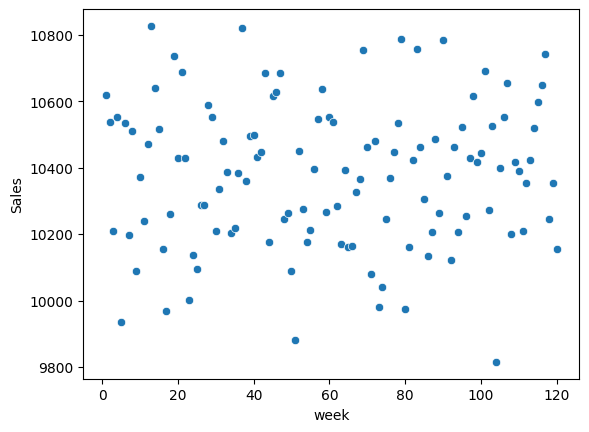

In [11]:
sns.scatterplot(x='week', y='Sales', data=df)

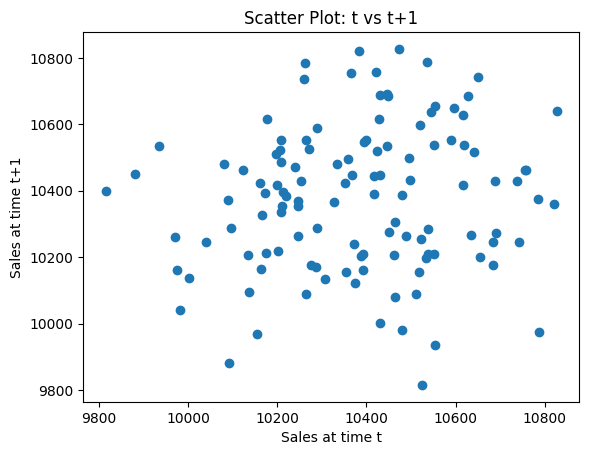

In [12]:
plt.scatter(df['Sales'][:-1], df['Sales'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

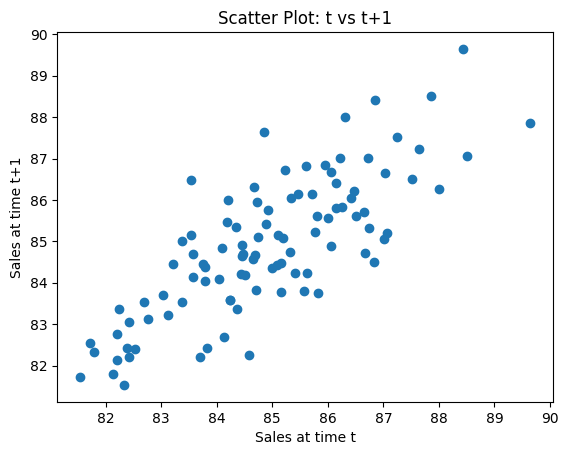

In [17]:
plt.scatter(df1['Reading'][:-1], df1['Reading'][1:])
plt.title('Scatter Plot: t vs t+1')
plt.xlabel('Sales at time t')
plt.ylabel('Sales at time t+1')
plt.show()

Autocovariance at lag T/4: 23200.01905000001


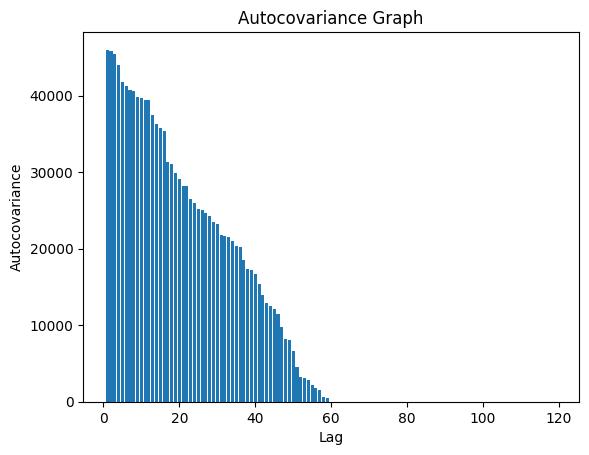

In [25]:
# Calculate autocovariance values for different lags
lags = len(df['Sales']) //4
autocovariance_values = autocovariance(df['Sales'], lag)

# Print the autocovariance at T/4 lag
print(f'Autocovariance at lag T/4: {autocovariance_value}')

# Plot autocovariance graph
lags = range(1, len(df['Sales']))
autocovariance_values = [autocovariance(df['Sales'], lag) for lag in lags]

# Plot autocovariance graph
plt.bar(lags, autocovariance_values)
plt.title('Autocovariance Graph')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.show()

In [37]:
R_mean = df1["Reading"].mean()
R_mean

84.915335

In [31]:
X=0
for i in range(100):
    X+= (df1["Reading"][i]-R_mean)**2
c0 = (1/100)*X

In [32]:
summ=0
for i in range(99):
    summ+= (df1["Reading"][i]-R_mean)*(df1["Reading"][i+1]-R_mean)
c1 = summ/100

In [36]:
c1*100

220.31374556027515

In [35]:
c0*100

280.9332232475001

In [39]:
r1 = c1/c0
r1

0.7842210437538046

In [47]:
# Calculate autocovariance coefficients up to c25
c_values = np.zeros(26)  # Initialize an array to store c0 to c25

for k in range(26):
    summ = 0
    for i in range(100 - k):
        summ += (df1["Reading"][i] - R_mean) * (df1["Reading"][i + k] - R_mean)
    c_values[k] = summ / 100

In [48]:
c_values

array([ 2.80933223,  2.20313746,  1.76440272,  1.38102314,  1.01944475,
        0.85558721,  0.58708791,  0.46163073,  0.40675999,  0.29111733,
        0.18698471,  0.01108516, -0.21695819, -0.14595869,  0.05765553,
        0.2044723 ,  0.19877034,  0.00374679, -0.16135807, -0.34589973,
       -0.5072173 , -0.45642164, -0.41010496, -0.24558815, -0.03252493,
        0.17747218])

In [50]:
r_values = c_values / c_values[0]

In [51]:
r_values

array([ 1.        ,  0.78422104,  0.62805057,  0.49158413,  0.36287796,
        0.30455181,  0.20897774,  0.16432045,  0.14478885,  0.1036251 ,
        0.06655842,  0.00394583, -0.07722767, -0.05195494,  0.02052286,
        0.07278324,  0.07075359,  0.0013337 , -0.05743645, -0.12312525,
       -0.18054728, -0.16246624, -0.14597951, -0.08741869, -0.01157746,
        0.06317237])

In [52]:
df3 = pd.DataFrame(c_values, r_values)

In [53]:
df3

,0
1.000000,2.809332
0.784221,2.203137
0.628051,1.764403
0.491584,1.381023
0.362878,1.019445
0.304552,0.855587
0.208978,0.587088
0.164320,0.461631
0.144789,0.406760
0.103625,0.291117


In [59]:
df3["New_column"] = range(0,26)

In [60]:
df3

,0,New_column
1.000000,2.809332,0
0.784221,2.203137,1
0.628051,1.764403,2
0.491584,1.381023,3
0.362878,1.019445,4
0.304552,0.855587,5
0.208978,0.587088,6
0.164320,0.461631,7
0.144789,0.406760,8
0.103625,0.291117,9


In [20]:
# Calculate autocovariance at T/4 lag
lag_t4 = len(df['Sales']) // 4
autocovariance_t4 = autocovariance(df['Sales'], lag_t4)

# Calculate autocovariance at lag 0
autocovariance_0 = autocovariance(df['Sales'], 0)

# Create a new DataFrame with Ck and C0 columns
autocovariance_df = pd.DataFrame({
    'Ck': [autocovariance_t4] * len(df),
    'C0': [autocovariance_0] * len(df),
})

# Concatenate the new DataFrame with the original DataFrame
result_df = pd.concat([df, autocovariance_df], axis=1)

# Print the result
print(result_df)

     week    Sales           Ck            C0
0       1  10618.1  23200.01905  46877.516433
1       2  10537.9  23200.01905  46877.516433
2       3  10209.3  23200.01905  46877.516433
3       4  10553.0  23200.01905  46877.516433
4       5   9934.9  23200.01905  46877.516433
..    ...      ...          ...           ...
115   116  10650.0  23200.01905  46877.516433
116   117  10741.6  23200.01905  46877.516433
117   118  10246.0  23200.01905  46877.516433
118   119  10354.4  23200.01905  46877.516433
119   120  10155.4  23200.01905  46877.516433

[120 rows x 4 columns]
